In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plotSensor(array: iter, title: str, x_label: str, y_label: str):
    x = np.linspace(-40, 40, num=17)
    plt.figure(figsize=(10,4))
    for i in range(0, 8):
        plt.plot(x, array[:,i], marker='o', label=f'Sensor {i}')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

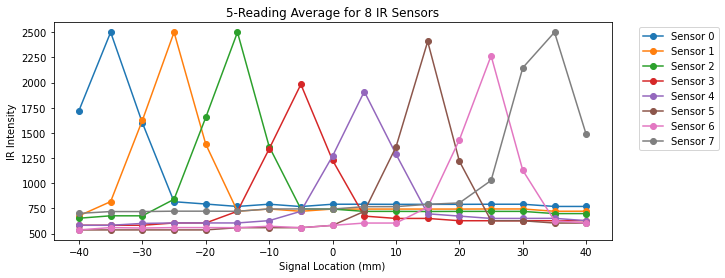

In [4]:
file_path = '../Documentation/Calibration/'
file_name = 'sensorcalibration_28042022_2249.txt'
input_file = file_path + file_name

# (5*11) x 9 array generated
data_raw = np.genfromtxt(input_file, delimiter=',')
# Remove empty 9th row, now (5*11) x 8 array
data_raw = np.delete(data_raw, 8, 1)

# Calculate means of every 5 rows
# 11 x 8 array of means
data_mean = np.empty((17, 8))
for i in range(17):
    data_mean[i] = np.mean(data_raw[5*i:5*i+5], 0)

# Plot
plotSensor(data_mean, '5-Reading Average for 8 IR Sensors', 'Signal Location (mm)', 'IR Intensity')

In [12]:
f = open('../Documentation/Calibration/sensorcalibration_28042022_2249.txt', 'r')
l = f.readlines()[0].rstrip(',\n').split(',')
l = [int(item) for item in l]
l

[1733, 669, 645, 575, 575, 528, 528, 693]

[768.2 676.2 652.2 582.2 582.2 536.  536.  700.2]


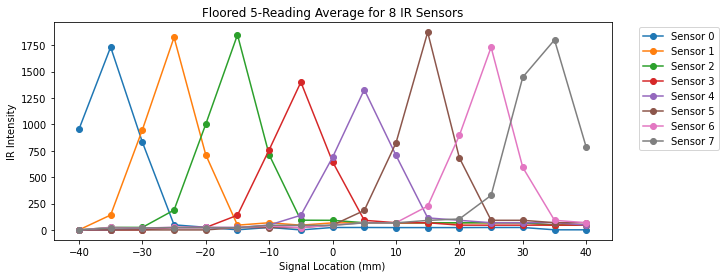

In [5]:
# Normalization

# Flooring
data_min = np.amin(data_mean, 0)
print(data_min)
#print(data_min)
data_floor = data_mean.copy()
for idx, subtrahend in enumerate(data_min):
    data_floor[:,idx] -= subtrahend
#print(data_floor)
#print(data_floor[:,0])
plotSensor(data_floor, 'Floored 5-Reading Average for 8 IR Sensors', 'Signal Location (mm)', 'IR Intensity')

[1731.8 1823.8 1847.8 1399.8 1328.8 1872.2 1730.2 1799.8]


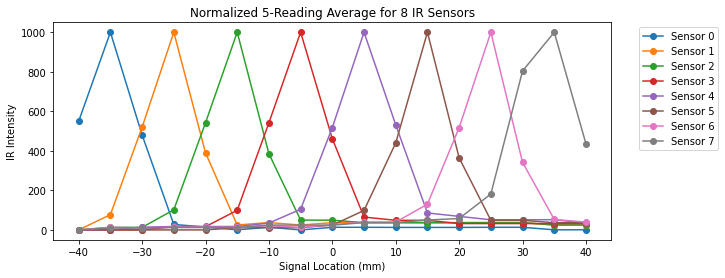

In [6]:
# Max scaling
data_max = np.max(data_floor, 0)
print(data_max)
data_norm = data_floor.copy()
for idx, subtrahend in enumerate(data_max):
    data_norm[:, idx] /= data_max[idx]
    data_norm[:, idx] *= 1000
plotSensor(data_norm, 'Normalized 5-Reading Average for 8 IR Sensors', 'Signal Location (mm)', 'IR Intensity')

In [7]:
# Applying Weights

# Distance errors (mm)
errors = np.linspace(-40, 40, num=17)

# Weights
weights = [-8, -4, -2, -1, 1, 2, 4, 8]
weights = [num / 4. for num in weights]
print(weights)
#print(data_norm)
fusion = [(np.sum(np.multiply(row, weights))) for row in data_norm]
fusion_str = [str(item) for item in fusion]
suffix = file_name.lstrip('sensorcalibration_')
export = open(f'{file_path}fusion_{suffix}', 'w')
export.writelines('\n'.join(fusion_str))

[-2.0, -1.0, -0.5, -0.25, 0.25, 0.5, 1.0, 2.0]


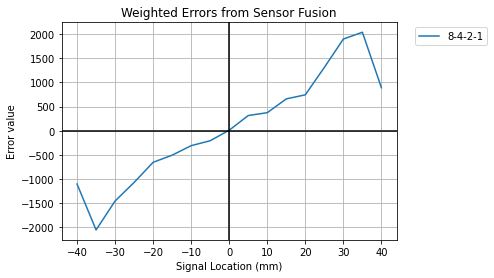

In [8]:
plt.figure(figsize=(6,4))
plt.plot(errors, fusion, label='8-4-2-1')
plt.title('Weighted Errors from Sensor Fusion')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.ylabel('Error')
plt.xlabel('Signal Location (mm)')
plt.grid(True)
plt.axhline(0, color='black')
plt.axvline(0, color='black')